In [1]:
import pandas as pd
import nltk
import re
import numpy as np
import torch
import transformers as ppb

from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics, svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, train_test_split

In [2]:
df = pd.read_csv('../final_racism/final_modularized.csv')
df.head().T

,0,1,2,3,4
text,VOCE VAI PROVAR NA JUSTIÇA QUE A PAULINHA É RA...,"Dizendo umas histórias doidas, dizendo que meu...",Esse sou eu tocando no violão. A diferença pra...,"Eu sou a única q não fica nessa ""só uso roupa ...",Eu custo ficar feliz com o negócio da peneira ...
is_racism,0,0,0,0,0
is_against,0,0,0,0,0


In [3]:
df.is_racism.value_counts()

0    123
1    118
Name: is_racism, dtype: int64

<AxesSubplot:>

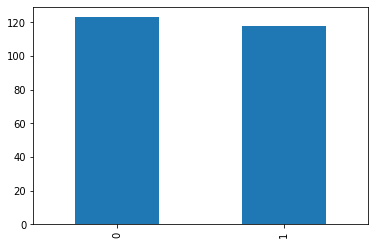

In [4]:
df.is_racism.value_counts().plot(kind='bar')

In [5]:
tweets_with_stopwords = df['text'].values
classes = df['is_racism'].values

In [6]:
# Remove Stop Words from database
nltk.download('stopwords')

stopwords = {'estão', 'tivermos', 'tiveram', 'ao', 'houvera', 'isto', 'tenhamos', 'esse', 'num', 'lhe', 'teria', 'muito',
 'houverem', 'estivéramos', 'era', 'aquele', 'houver', 'houverei', 'deles', 'pelo', 'te', 'estivera', 'isso',
 'fora', 'qual', 'houvesse', 'houvessem', 'esteja', 'sua', 'tivesse', 'suas', 'das', 'houvermos', 'aqueles',
 'nem', 'estejamos', 'éramos', 'estivermos', 'tivéramos', 'nós', 'tua', 'houveria', 'houvemos', 'fomos', 'tenha',
 'este', 'tinha', 'forem', 'só', 'haja', 'terão', 'também', 'um', 'teus', 'minhas', 'terei', 'tínhamos', 'uma',
 'teve', 'tuas', 'o', 'ou', 'houveremos', 'fosse', 'tiver', 'minha', 'mesmo', 'numa', 'da', 'meu', 'esteve', 'do',
 'for', 'ele', 'os', 'já', 'ela', 'dela', 'quem', 'nosso', 'me', 'estiveram', 'em', 'seu', 'aquilo', 'hão', 'até',
 'houverá', 'houverão', 'mas', 'houvéramos', 'estive', 'depois', 'elas', 'tivera', 'delas', 'nossas', 'foram',
 'nossa', 'houveram', 'aos', 'eles', 'hajamos', 'pelos', 'esta', 'fossem', 'estas', 'dos', 'entre', 'tenho',
 'pelas', 'estivemos', 'é', 'tivemos', 'tivéssemos', 'seria', 'pela', 'tenham', 'mais', 'temos',
 'sem', 'eu', 'e', 'no', 'quando', 'teu', 'havemos', 'com', 'houveriam', 'essa', 'essas', 'tive', 'tu',
 'nos', 'nossos', 'seus', 'dele', 'vocês', 'teriam', 'você', 'às', 'aquelas', 'estivéssemos', 'as', 'estes',
 'há', 'houveríamos', 'será', 'como', 'à', 'tinham', 'hei', 'tém', 'terá', 'se', 'formos', 'a', 'que', 'sejam', 
 'foi', 'estava', 'de', 'tiverem', 'está', 'hajam', 'seja', 'estiver', 'lhes', 'estejam', 'eram', 'tem', 'teremos',
 'meus', 'por', 'houve', 'teríamos', 'para', 'aquela', 'tivessem', 'vos', 'houvéssemos', 'na', 'nas', 'esses'}

def removeStopWords(instance):
    words = [ i.lower() for i in instance.split() if not i in stopwords ]
    return ( " ".join(words))

tweets = [ removeStopWords(tweet) for tweet in tweets_with_stopwords ]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lamarcelo.augusto/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# Remove caracteres
def clean_data(instance):
    instance = re.sub(r'http\S+', '', instance)
    instance = re.sub(r'@\S+', '', instance)
    instance = re.sub('\?|\.|\!|\/|\;|\:|\—|\]|\[|\,', '', instance)

    return instance.strip()

tweets = [ clean_data(tweet) for tweet in tweets ]

In [12]:
tweet_tokenizer = TweetTokenizer() 

vectorizer = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)
#vectorizer = CountVectorizer(analyzer="word", ngram_range=(1,2), tokenizer=tweet_tokenizer.tokenize)

freq_tweets = vectorizer.fit_transform(tweets)

In [13]:
freq_tweets.shape

(241, 1499)

In [262]:
# Naive Bayers Model

model = MultinomialNB()
model.fit(freq_tweets, classes)

MultinomialNB()

In [269]:
# SVM Model

model = svm.SVC()
model.fit(freq_tweets, classes)

SVC()

In [14]:
# Logistic Regression Model

model = LogisticRegression()
model.fit(freq_tweets, classes)

LogisticRegression()

In [15]:
# Cross Validation

results = cross_val_predict(model, freq_tweets, classes, cv=10)

print(metrics.accuracy_score(classes, results))

0.8174273858921162


In [19]:
tests = [
    'eu vi um macaco subindo na árvore',
    'meu cabelo é preto'
]

freq_testes = vectorizer.transform(tests)

print(model.predict(freq_testes))
model.predict_proba(freq_testes).round(2)

[1 1]


array([[0.1 , 0.9 ],
       [0.14, 0.86]])

In [17]:
print(model.classes_)
model.predict_proba(freq_testes).round(2)

[0 1]


array([[0.1 , 0.9 ],
       [0.14, 0.86]])